# Problem definition

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

# Import Library

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.pyplot import figure
from sklearn import preprocessing

## sk-learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import xgboost
from IPython.display import Markdown
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import StandardScaler
from mlxtend.evaluate import bias_variance_decomp
from sklearn import neighbors, datasets, preprocessing


from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

##Hyperparameter Tuning
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


##Model Evaluation
from sklearn.metrics import  plot_roc_curve
from sklearn.metrics import roc_curve

## Feature Importance
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

## Pickle
import pickle

## Save Image
from PIL import Image 
import PIL

# Define Function

In [42]:
def remove_outliers(df,variables):
    q1 = percentile25 = df[variables].quantile(0.25)
    q3 = percentile75 = df[variables].quantile(0.75)
    iqr = q3-q1
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    df[df[variables] > upper_limit]
    df[df[variables] < lower_limit]
    new_data = df[df[variables] < upper_limit]
    df[variables] = np.where(
        df[variables] > upper_limit,
        upper_limit,
        np.where(
        df[variables] < lower_limit,
        lower_limit,
        df[variables]
        )
    )
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(df[variables])
    plt.subplot(2,2,2)
    sns.boxplot(df[variables])

In [43]:
def fit_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, X_test, y_test, y_pred

In [44]:
def accuracy_report(model, X_test, x,y):
    testing_accuracy =  accuracy_score(x, y) * 100
    testing_accuracy = "{:.2f}".format(testing_accuracy)
    roc_score = roc_auc_score(x, y)*100
    roc_score = "{:.2f}".format(roc_score)
    print('The accuracy of testing data is ', testing_accuracy, '%')
    print('The ROC_AUC score is ' , roc_score, '%')
    print(' ')
    print(classification_report(x, y))
    clf = confusion_matrix(x,y)
    ax = sns.heatmap(clf, annot=True, cmap='Blues', fmt='g')
    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    ## Display the visualization of the Confusion Matrix.
    plt.show()
    print(' ')

In [45]:
def fit_and_evaluate(models_dict, X_train, y_train, X_test):
    """"
    Fit and evaluate machine learning models given in a dictionary.
    models_dict: Dictionary containing different estimators.
    """
    evaluations = {}
    
    for name, model in models_dict.items():
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        evaluations[name] = score
        print(f'{name} estimated with {score * 100:.2f}% accuracy')
        
    return evaluations

In [46]:
def cv_metrics(scoring_parameter, clf):
    """
    Used to calculate different cross-validated metrics.
    Returns the mean of the evaluated metric.
    scoring_parameter: String indicating the scoring metric.
    clf: Estimator used
    """
    metric = cross_val_score(clf, X_data, y_data,
                    cv=5,
                    scoring=scoring_parameter,
                    n_jobs=-1,
                    verbose=0)
    return np.mean(metric)

In [47]:
def feature_importance(model,X_train,y_train):
    model.fit(X_train,y_train)
    results = permutation_importance(model, X_train,y_train, scoring='accuracy')
    importance = results.importances_mean
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))
    # plot feature importance
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()


In [48]:
def cal_recall(model_recall_dict):

    cv_recall = {}
    
    for name, model in model_recall_dict.items():
        cv_recall_score = cv_metrics('recall',model)
        cv_recall[name] = cv_recall_score
        print(f'{name} estimated with {cv_recall_score}% recall')
        
    return cv_recall

In [49]:
def cal_f1(model_f1_dict):

    cv_f1 = {}
    
    for name, model in model_f1_dict.items():
        cv_f1_score = cv_metrics('f1',model)
        cv_f1[name] = cv_f1_score      
    return cv_f1

# Analysis Data

In [50]:
dataset = pd.read_csv("HeartDiseaseTrain-Test.csv")

In [51]:
dataset.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [52]:
dataset.shape

(1025, 14)

In [53]:
dataset.dtypes

age                                int64
sex                               object
chest_pain_type                   object
resting_blood_pressure             int64
cholestoral                        int64
fasting_blood_sugar               object
rest_ecg                          object
Max_heart_rate                     int64
exercise_induced_angina           object
oldpeak                          float64
slope                             object
vessels_colored_by_flourosopy     object
thalassemia                       object
target                             int64
dtype: object

In [54]:
print(dataset.nunique())

age                               41
sex                                2
chest_pain_type                    4
resting_blood_pressure            49
cholestoral                      152
fasting_blood_sugar                2
rest_ecg                           3
Max_heart_rate                    91
exercise_induced_angina            2
oldpeak                           40
slope                              3
vessels_colored_by_flourosopy      5
thalassemia                        4
target                             2
dtype: int64


In [55]:
for col_name in dataset.columns:
    print(dataset[col_name].unique())

[52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
['Male' 'Female']
['Typical angina' 'Atypical angina' 'Non-anginal pain' 'Asymptomatic']
[125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
[212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168
 

## Missing value analysis

In [56]:
dataset.isnull().sum()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

There is no null value so that we can proceed to next step

# Exploratory Data Analysis

## Distribution

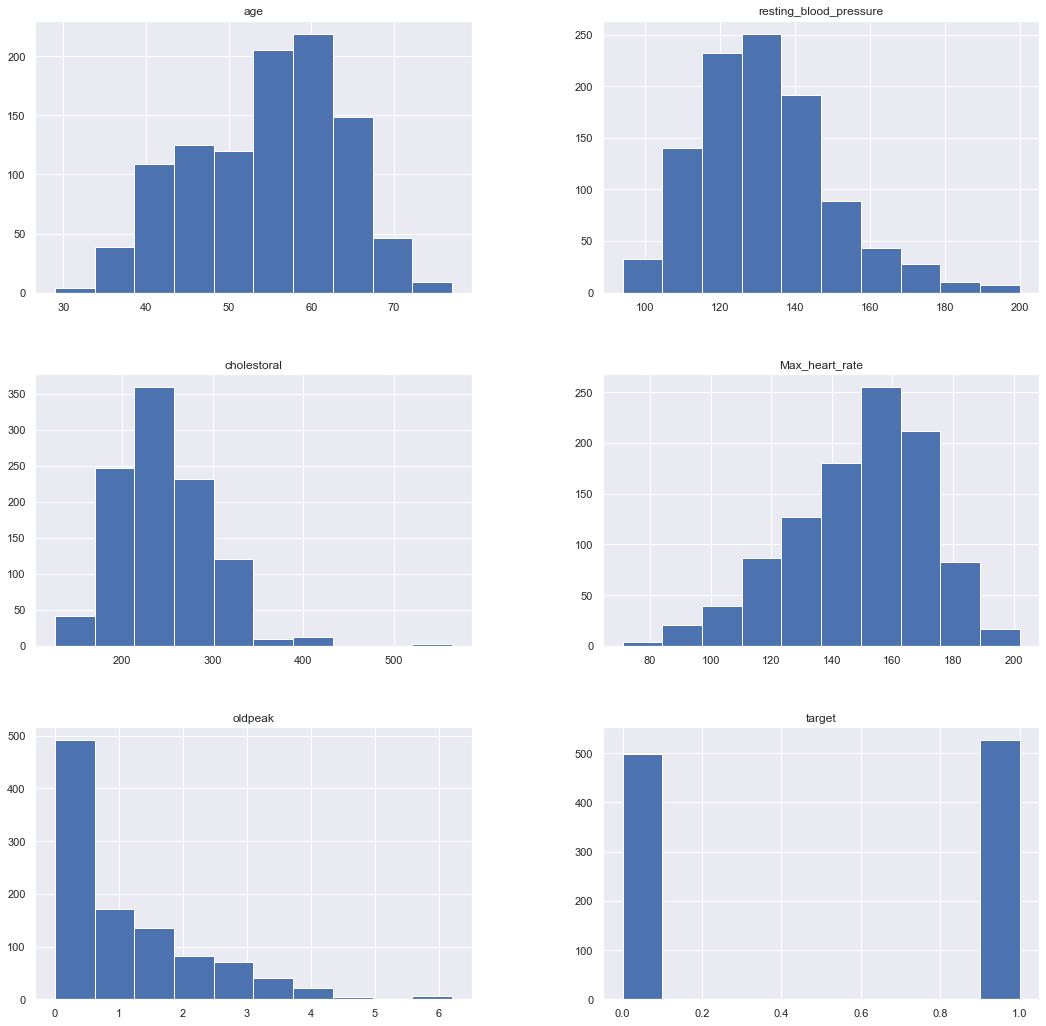

In [57]:
dataset.hist(figsize = (18,18))
plt.show()

                           target
sex    target                    
Female Heart Disease     0.724359
       No Heart Disease  0.275641
Male   No Heart Disease  0.579243
       Heart Disease     0.420757


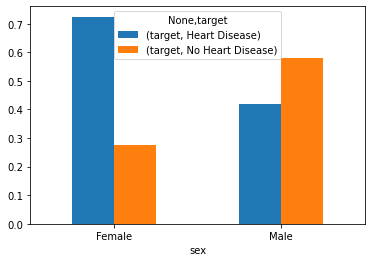

In [18]:
copy_target = dataset
copy_target['target'] = dataset['target'].replace([0],'No Heart Disease')
copy_target['target'] = dataset['target'].replace([1],'Heart Disease')

plot2=pd.DataFrame(dataset.groupby('sex')['target'].value_counts(normalize=True))
plot2.unstack().plot(kind='bar')
plt.xticks(rotation=0)
print(plot2)
plt.savefig("../HeartDisease/images/sex.jpg")

target : 0 No Heart disease, 1 Heart disease
Based on the graph above, we can see that Male has the highest number of no heart disease, whereas female is the highest number that has heart disease

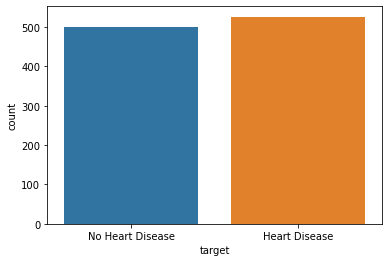

In [19]:
# visualize the target variable
sns.countplot(x='target',data=copy_target)

plt.savefig("../HeartDisease/images/target.jpg")


From this count plot, it can be seen that there were a lot of people who not suffer heart disease. The data is imbalance because the ratio is 1:12.

In [20]:
for i in copy_target['age'].values:
    if i < 30 :
        copy_target['age'] = copy_target['age'].replace(i,'Below 30')
    elif i >= 30 and i < 41:
        copy_target['age'] = copy_target['age'].replace(i,'30 - 40')
    elif i >= 40 and i <51:
        copy_target['age'] = copy_target['age'].replace(i,'41 - 50')

    elif i >= 51 and i <61:
        copy_target['age'] = copy_target['age'].replace(i,'51 - 60')
        
    elif i >= 61 and i <71:
        copy_target['age'] = copy_target['age'].replace(i,'61 - 70')

    else:
        copy_target['age'] = copy_target['age'].replace(i,'Above 70')



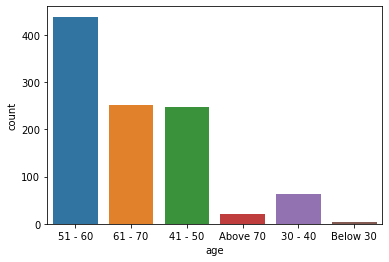

In [21]:
# visualize the target variable
sns.countplot(x='age',data=copy_target)
plt.savefig("../HeartDisease/images/age.jpg")

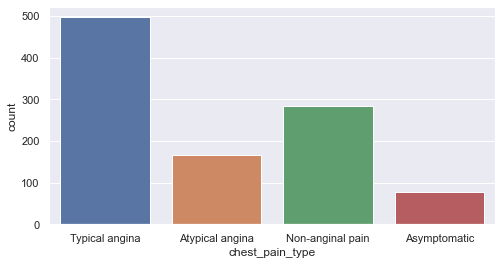

In [22]:
# visualize the target variable
sns.set(rc={"figure.figsize":(8, 4)}) #width=3, #height=4

sns.countplot(x='chest_pain_type',data=copy_target)
plt.savefig("../HeartDisease/images/chest_pain_type.jpg")

In [23]:
for i in copy_target['resting_blood_pressure'].values:
    if i < 100 :
        copy_target['resting_blood_pressure'] = copy_target['resting_blood_pressure'].replace(i,'Below 100')

    elif i >= 101 and i <= 120:
        copy_target['resting_blood_pressure'] = copy_target['resting_blood_pressure'].replace(i,'101 - 120')
    elif i >= 121 and i <= 140:
        copy_target['resting_blood_pressure'] = copy_target['resting_blood_pressure'].replace(i,'121 - 140')

    elif i >= 141 and i < 161:
        copy_target['resting_blood_pressure'] = copy_target['resting_blood_pressure'].replace(i,'141 - 160')
    else:
        copy_target['resting_blood_pressure'] = copy_target['resting_blood_pressure'].replace(i,'Above 161')




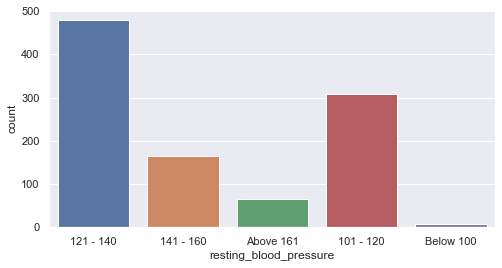

In [24]:
# visualize the target variable
sns.set(rc={"figure.figsize":(8, 4)}) #width=3, #height=4

sns.countplot(x='resting_blood_pressure',data=copy_target)
plt.savefig("../HeartDisease/images/resting_blood_pressure.jpg")

In [25]:
for i in copy_target['cholestoral'].values:
    if i < 150 :
        copy_target['cholestoral'] = copy_target['cholestoral'].replace(i,'Below 150')

    elif i >= 151 and i <= 200:
        copy_target['cholestoral'] = copy_target['cholestoral'].replace(i,'151 - 200')
    elif i >= 201 and i <= 250:
        copy_target['cholestoral'] = copy_target['cholestoral'].replace(i,'201 - 250')

    elif i >= 251 and i < 301:
        copy_target['cholestoral'] = copy_target['cholestoral'].replace(i,'251 - 300')
    else:
        copy_target['cholestoral'] = copy_target['cholestoral'].replace(i,'Above 301')




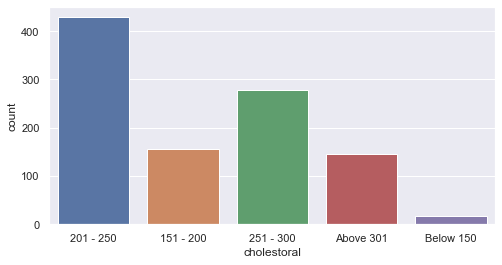

In [26]:
# visualize the target variable
sns.set(rc={"figure.figsize":(8, 4)}) #width=3, #height=4

sns.countplot(x='cholestoral',data=copy_target)
plt.savefig("../HeartDisease/images/cholestoral.jpg")

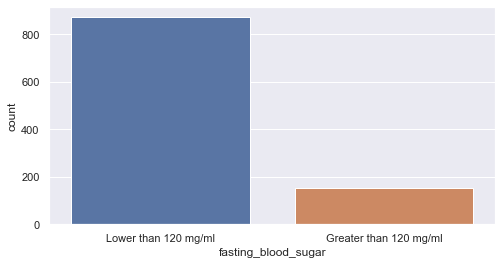

In [27]:
# visualize the target variable
sns.set(rc={"figure.figsize":(8, 4)}) #width=3, #height=4

sns.countplot(x='fasting_blood_sugar',data=copy_target)
plt.savefig("../HeartDisease/images/fasting_blood_sugar.jpg")

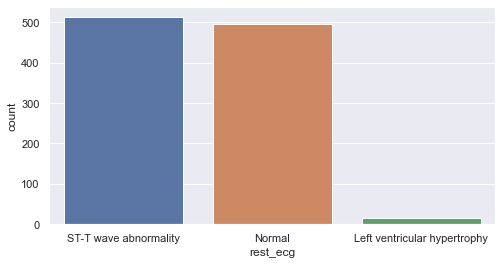

In [28]:
# visualize the target variable
sns.set(rc={"figure.figsize":(8, 4)}) #width=3, #height=4

sns.countplot(x='rest_ecg',data=copy_target)
plt.savefig("../HeartDisease/images/rest_ecg.jpg")

In [29]:
for i in copy_target['Max_heart_rate'].values:
    if i < 100 :
        copy_target['Max_heart_rate'] = copy_target['Max_heart_rate'].replace(i,'Below 100')

    elif i >= 101 and i <= 130:
        copy_target['Max_heart_rate'] = copy_target['Max_heart_rate'].replace(i,'101 - 130')
    elif i >= 131 and i <= 160:
        copy_target['Max_heart_rate'] = copy_target['Max_heart_rate'].replace(i,'131 - 160')

    elif i >= 161 and i < 191:
        copy_target['Max_heart_rate'] = copy_target['Max_heart_rate'].replace(i,'161 - 190')
    else:
        copy_target['Max_heart_rate'] = copy_target['Max_heart_rate'].replace(i,'Above 191')




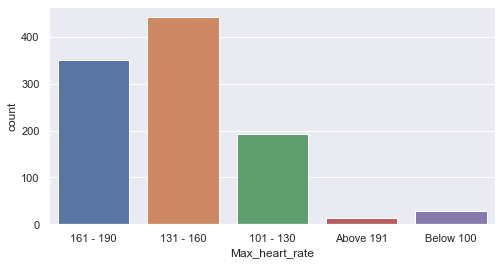

In [30]:
# visualize the target variable
sns.set(rc={"figure.figsize":(8, 4)}) #width=3, #height=4

sns.countplot(x='Max_heart_rate',data=copy_target)
plt.savefig("../HeartDisease/images/Max_heart_rate.jpg")

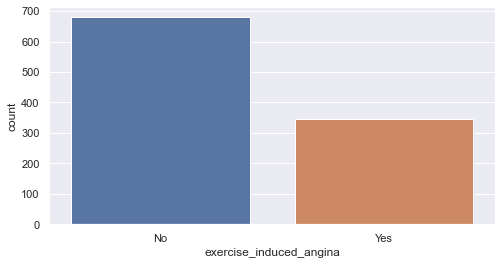

In [31]:
# visualize the target variable
sns.set(rc={"figure.figsize":(8, 4)}) #width=3, #height=4

sns.countplot(x='exercise_induced_angina',data=copy_target)
plt.savefig("../HeartDisease/images/exercise_induced_angina.jpg")

In [32]:
for i in copy_target['oldpeak'].values:
    if i < 1.0 :
        copy_target['oldpeak'] = copy_target['oldpeak'].replace(i,'Below 1.0')

    elif i >= 1.0 and i <= 2.0:
        copy_target['oldpeak'] = copy_target['oldpeak'].replace(i,'1.0 - 2.0')
    elif i >= 3.0 and i <= 4.0:
        copy_target['oldpeak'] = copy_target['oldpeak'].replace(i,'3.0 - 4.0')
    else:
        copy_target['oldpeak'] = copy_target['oldpeak'].replace(i,'Above 4.1')




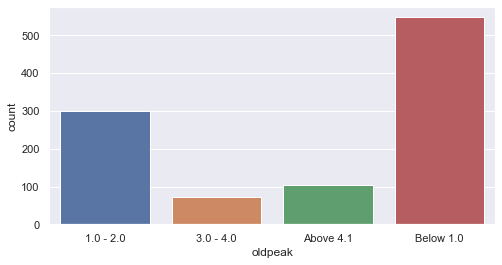

In [33]:
# visualize the target variable
sns.set(rc={"figure.figsize":(8, 4)}) #width=3, #height=4

sns.countplot(x='oldpeak',data=copy_target)
plt.savefig("../HeartDisease/images/oldpeak.jpg")

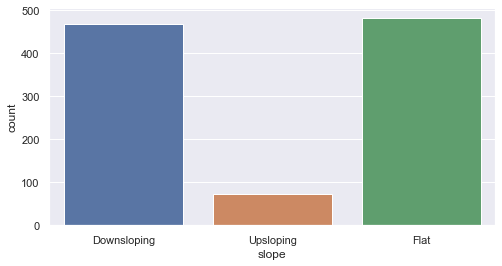

In [34]:
# visualize the target variable
sns.set(rc={"figure.figsize":(8, 4)}) #width=3, #height=4

sns.countplot(x='slope',data=copy_target)
plt.savefig("../HeartDisease/images/slope.jpg")

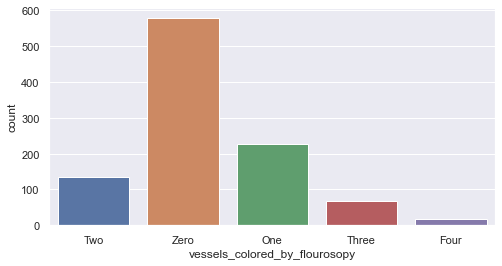

In [35]:
# visualize the target variable
sns.set(rc={"figure.figsize":(8, 4)}) #width=3, #height=4

sns.countplot(x='vessels_colored_by_flourosopy',data=copy_target)
plt.savefig("../HeartDisease/images/vessels_colored_by_flourosopy.jpg")

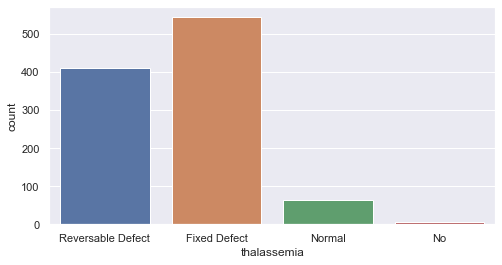

In [36]:
# visualize the target variable
sns.set(rc={"figure.figsize":(8, 4)}) #width=3, #height=4

sns.countplot(x='thalassemia',data=copy_target)
plt.savefig("../HeartDisease/images/thalassemia.jpg")

## Correlation

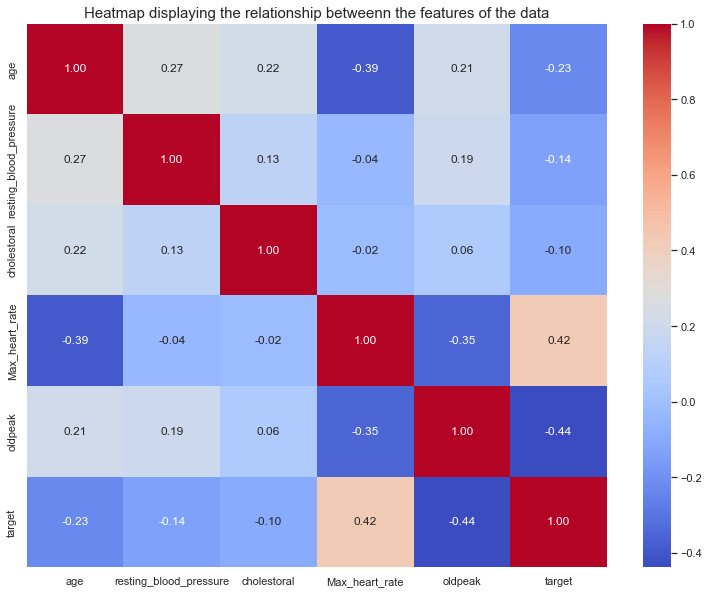

In [58]:
plt.figure(figsize=(13,10))
sns.heatmap(dataset.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.title('Heatmap displaying the relationship betweenn the features of the data',
fontsize=15)
plt.show()

## Outliers

<AxesSubplot:xlabel='resting_blood_pressure'>

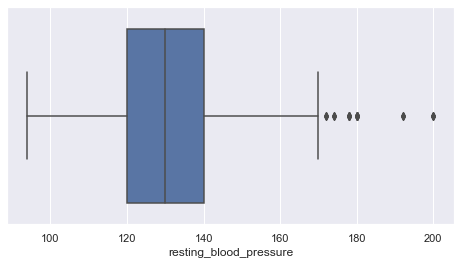

In [59]:
sns.boxplot(x=dataset['resting_blood_pressure'])

<AxesSubplot:xlabel='cholestoral'>

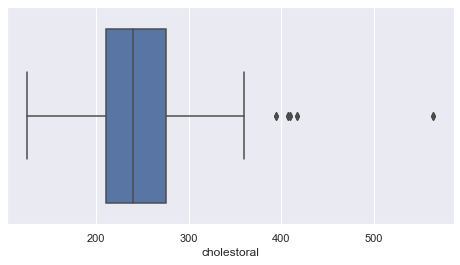

In [60]:
sns.boxplot(x=dataset['cholestoral'])

<AxesSubplot:xlabel='Max_heart_rate'>

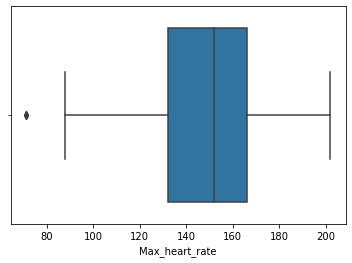

In [ ]:
sns.boxplot(x=dataset['Max_heart_rate'])

<AxesSubplot:xlabel='oldpeak'>

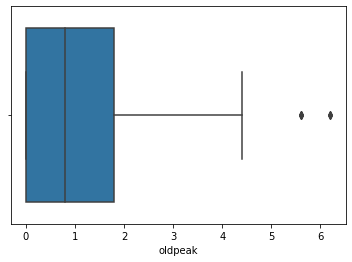

In [ ]:
sns.boxplot(x=dataset['oldpeak'])

## Skewness

In [ ]:
skew = pd.DataFrame(dataset.skew(numeric_only=True))
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

,skew,too_skewed
age,-0.248866,False
resting_blood_pressure,0.739768,False
cholestoral,1.074073,True
Max_heart_rate,-0.513777,False
oldpeak,1.210899,True
target,-0.052778,False


### Remove outliers

#### resting_blood_pressure

c:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


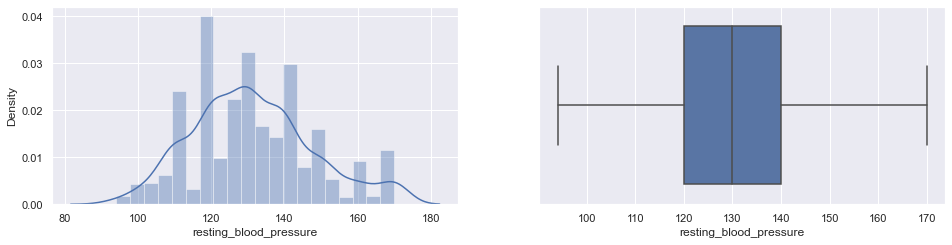

In [61]:
remove_outliers(dataset,'resting_blood_pressure')

#### Max_heart_rate

c:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


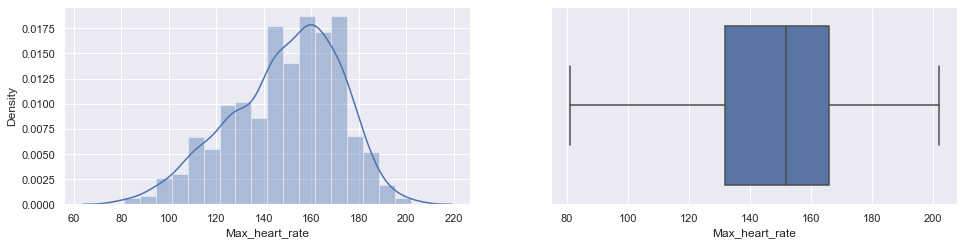

In [62]:
remove_outliers(dataset,'Max_heart_rate')

#### cholestoral

c:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


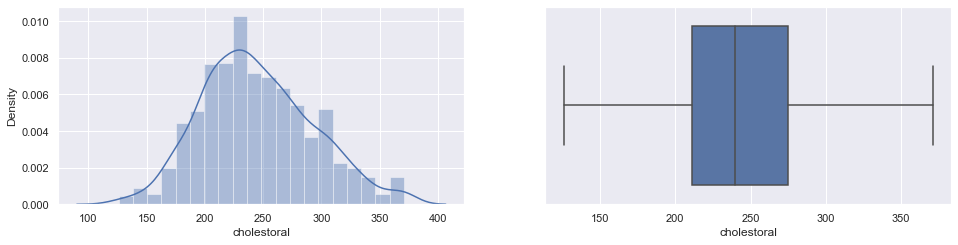

In [63]:
remove_outliers(dataset,'cholestoral')

#### oldpeak

c:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


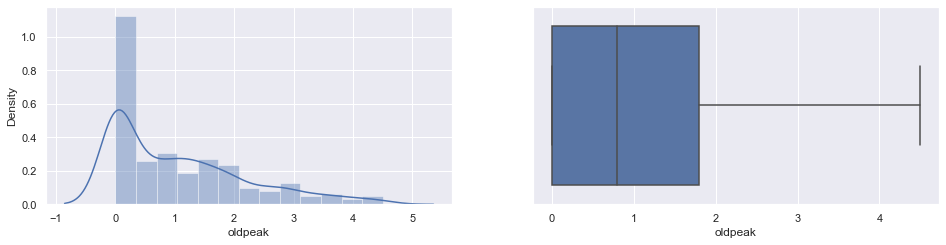

In [64]:
remove_outliers(dataset,'oldpeak')

In [65]:
dataset.shape

(1025, 14)

In [66]:
skew = pd.DataFrame(dataset.skew(numeric_only=True))
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

,skew,too_skewed
age,-0.248866,False
resting_blood_pressure,0.402284,False
cholestoral,0.343813,False
Max_heart_rate,-0.474860,False
oldpeak,1.019303,True
target,-0.052778,False


After I have removed the outliers, the row of the dataset still remain the same.

## Encode data

In [ ]:
dataset.shape

(1025, 14)

In [ ]:
label_encoder = preprocessing.LabelEncoder()
for col in dataset:
    if dataset[col].dtype.name != 'object':
        continue
    dataset[col]= label_encoder.fit_transform(dataset[col])

In [ ]:
for col_name in dataset.columns:
    print(dataset[col_name].unique())

[52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
[1 0]
[3 1 2 0]
[125. 140. 145. 148. 138. 100. 114. 160. 120. 122. 112. 132. 118. 128.
 124. 106. 104. 135. 130. 136. 170. 129. 150. 146. 117. 152. 154. 134.
 144. 108. 123. 110. 142. 126. 115.  94. 165. 102. 105. 155. 164. 156.
 101.]
[212. 203. 174. 294. 248. 318. 289. 249. 286. 149. 341. 210. 298. 204.
 308. 266. 244. 211. 185. 223. 208. 252. 209. 307. 233. 319. 256. 327.
 169. 131. 269. 196. 231. 213. 271. 263. 229. 360. 258. 330. 342. 226.
 228. 278. 230. 283. 241. 175. 188. 217. 193. 245. 232. 299. 288. 197.
 315. 215. 164. 326. 207. 177. 257. 255. 187. 201. 220. 268. 267. 236.
 303. 282. 126. 309. 186. 275. 281. 206. 335. 218. 254. 295. 371. 260.
 240. 302. 192. 225. 325. 235. 274. 234. 182. 167. 172. 321. 300. 199.
 157. 304. 222. 184. 354. 160. 247. 239. 246. 293. 180. 250. 221. 200.
 227. 243. 311. 261. 242. 205. 306. 219. 353. 198. 183. 237. 224. 265.

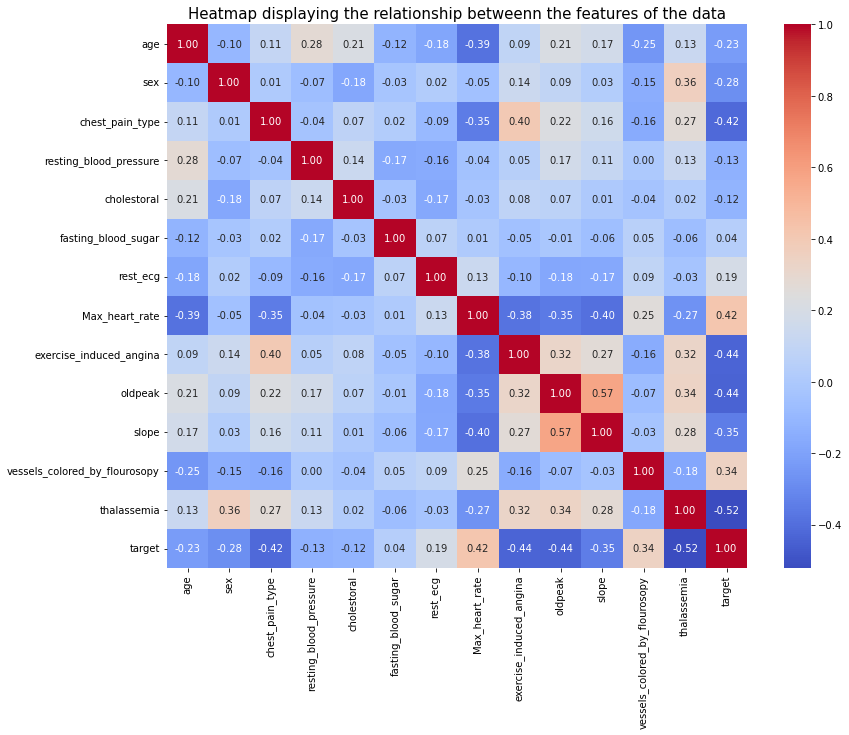

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(dataset.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.title('Heatmap displaying the relationship betweenn the features of the data',
fontsize=15)
plt.show()

In [ ]:
dataset.shape

(1025, 14)

In [ ]:
#split data into feature and target
X_data = dataset.drop(['target'],axis=1)
 
y_data = dataset.target.values

## Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42, shuffle=True)

## Standardization

### Standard Scaler

In [ ]:
X_train_ss =  StandardScaler().fit_transform(X_train)
X_test_ss =  StandardScaler().fit_transform(X_test)

### MinMax Scaler

In [ ]:
X_train_mm =  MinMaxScaler().fit_transform(X_train)
X_test_mm =  MinMaxScaler().fit_transform(X_test)

## Balance Data

### Oversampling

In [ ]:
sm = SMOTE()
X_train_os_ss, y_train_os_ss = sm.fit_resample(X_train_ss, y_train)

In [ ]:
X_train_os_mm, y_train_os_mm = sm.fit_resample(X_train_mm, y_train)

In [ ]:
X_train_os, y_train_os = sm.fit_resample(X_train, y_train)

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_os_ss == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_os_ss == 0)))

Before OverSampling, counts of label '1': 377
Before OverSampling, counts of label '0': 340
After OverSampling, counts of label '1': 377
After OverSampling, counts of label '0': 377


### Undersampling

In [ ]:
nr = NearMiss()
X_train_us_ss, y_train_us_ss = nr.fit_resample(X_train_ss, y_train)

In [ ]:
X_train_us_mm, y_train_us_mm = nr.fit_resample(X_train_mm, y_train)

In [ ]:
X_train_us, y_train_us = nr.fit_resample(X_train, y_train)

In [ ]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {}".format(sum(y_train == 0)))
print("After Undersampling, counts of label '1': {}".format(sum(y_train_us == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_us == 0)))

Before Undersampling, counts of label '1': 377
Before Undersampling, counts of label '0': 340
After Undersampling, counts of label '1': 340
After Undersampling, counts of label '0': 340


# Modelling

## Oversampling

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'KNeighbors': KNeighborsClassifier(),
    'GaussianNB': GaussianNB(),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(max_depth=2, random_state=0),
    'GradientBoosting' : GradientBoostingClassifier(),
    'Decision Tree' : DecisionTreeClassifier()
}

In [ ]:
evaluations = fit_and_evaluate(models, X_train_os_ss, y_train_os_ss, X_test_ss)
model_comparasions = pd.DataFrame(evaluations, index=['Accuracy'])
model_comparasions.T



Logistic Regression estimated with 79.55% accuracy
KNeighbors estimated with 87.66% accuracy
GaussianNB estimated with 80.84% accuracy


c:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


SVM estimated with 91.88% accuracy
Random Forest estimated with 83.44% accuracy
GradientBoosting estimated with 89.94% accuracy
Decision Tree estimated with 92.86% accuracy


,Accuracy
Logistic Regression,0.795455
KNeighbors,0.876623
GaussianNB,0.808442
SVM,0.918831
Random Forest,0.834416
GradientBoosting,0.899351
Decision Tree,0.928571


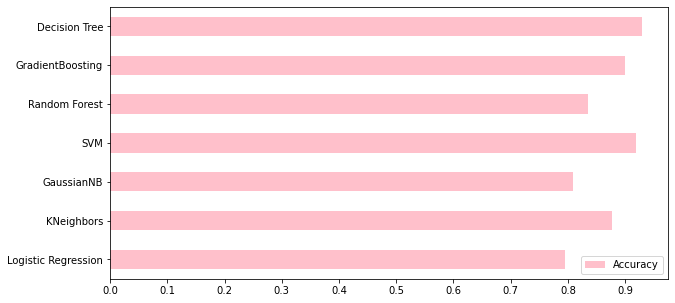

In [ ]:
model_comparasions.T.plot.barh(color=['pink'], figsize=(10, 5), xticks=np.arange(0, 1, 0.1));


# Experimentation

## Hyperparameter Tuning

### GridSearchCV 

In [52]:
## Logistic Regression
log_param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

## K Neartest Neighbour
k_range = list(range(1, 31))
knn_param_grid = { 'n_neighbors' : k_range,
'weights' : ['uniform','distance'],
'metric' : ['minkowski','euclidean','manhattan']}

## Random Forest
rf_param_grid = { 
    'max_depth': [3, 5],
    'max_features': ['sqrt'],
    'min_samples_leaf': np.arange(5, 10),
    'min_samples_split': np.arange(10, 20, 5),
    'n_estimators': np.arange(1500, 2000, 100)
}

## GaussianNB
gnb_param_grid = {
    'var_smoothing': np.logspace(0, -50, num=100)
}

## Decision Tree
dt_param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }

## Gradient Boosting
gb_param_grid={'learning_rate':[0.001,0.01,0.1,0.25,0.5,0.4],
       'max_depth' : [1,2,3,4,5,6],
       'max_features' : [1,2,3,4,5,6],
       'n_estimators' : [20,40,50,70,100]}

## SVM
svm_param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}



In [53]:
gs_scores = {}

In [54]:
clf_log = GridSearchCV(LogisticRegression(), param_grid = log_param_grid, verbose=True, n_jobs=-1)


In [55]:
clf_log.fit(X_train_os_ss, y_train_os_ss)


Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


c:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3600 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "c:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'none

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             verbose=True)

In [56]:
clf_log.best_params_


{'C': 0.08858667904100823,
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [57]:
gs_scores['Logistic Regressor'] = clf_log.score(X_test_ss, y_test)
clf_log.score(X_test_ss, y_test)

0.801948051948052

In [58]:
clf_knn = GridSearchCV(KNeighborsClassifier(), knn_param_grid, verbose = 1, cv=3, n_jobs = -1)


In [59]:
clf_knn.fit(X_train_os_ss, y_train_os_ss)


Fitting 3 folds for each of 180 candidates, totalling 540 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [60]:
clf_knn.best_params_


{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}

In [ ]:
#from sklearn.model_selection import cross_val_score,KFold
#kf=KFold(n_splits=5)
#score=cross_val_score(clf_knn,X_train_os_ss,y_train_os_ss,cv=kf)
#print("Cross Validation Scores are {}".format(score))
#print("Average Cross Validation score :{}".format(score.mean()))

In [61]:
gs_scores['KNN'] = clf_knn.score(X_test_ss, y_test)

In [62]:
clf_rf = GridSearchCV(RandomForestClassifier(),param_grid=rf_param_grid,n_jobs=-1,verbose=True)

In [63]:
clf_rf.fit(X_train_os_ss, y_train_os_ss)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5], 'max_features': ['sqrt'],
                         'min_samples_leaf': array([5, 6, 7, 8, 9]),
                         'min_samples_split': array([10, 15]),
                         'n_estimators': array([1500, 1600, 1700, 1800, 1900])},
             verbose=True)

In [64]:
clf_rf.best_params_


{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 15,
 'n_estimators': 1800}

In [65]:
gs_scores['Random Forest'] = clf_rf.score(X_test_ss, y_test)

In [66]:
clf_rf.score(X_test_ss, y_test)

0.8506493506493507

In [67]:
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)


clf_gnb = GridSearchCV(estimator=GaussianNB(), param_grid=gnb_param_grid, cv=cv_method,verbose=1,scoring='accuracy')


In [68]:
clf_gnb.fit(X_train_os_ss, y_train_os_ss)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 3.12571585e-01, 9.77009957e-02, 3.05385551e-02,
       9.54548457e-03, 2.98364724e-03, 9.32603347e-04, 2.91505306e-04,
       9.11162756e-05, 2.84803587e-05, 8.90215085e-06, 2.78255940e-06,
       8.69749003e-07, 2.71858824e-07, 8...
       4.13201240e-39, 1.29154967e-39, 4.03701726e-40, 1.26185688e-40,
       3.94420606e-41, 1.23284674e-41, 3.85352859e-42, 1.20450354e-42,
       3.76493581e-43, 1.17681195e-43, 3.67837977e-44, 1.14975700e-44,
       3.59381366e-45, 1.12332403e-45, 3.51119173e-46, 1.09749877e-46,
       3.43046929e-47, 1.07226722e-47, 3.35160265e-48, 1.04761575e-48,
       3.27454916e-49, 1.02353102e-49, 3.19926714e-50, 1.00000000e-50])},
             scoring='accuracy', verbose=1)

In [69]:
clf_gnb.best_params_


{'var_smoothing': 1.0}

In [70]:
gs_scores['GaussianNB'] = clf_gnb.score(X_test_ss, y_test)

In [71]:
clf_gnb.score(X_test_ss, y_test)

0.8116883116883117

In [72]:
tree_clas = DecisionTreeClassifier(random_state=1024)

In [73]:
clf_dt = GridSearchCV(estimator=tree_clas, param_grid=dt_param_grid, cv=5, verbose=True)
clf_dt.fit(X_train_os_ss, y_train_os_ss)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


c:\anaconda\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\anaconda\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\anaconda\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\anaconda\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\anaconda\lib\site-packages\sklearn\tree\_classes.py:298: 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [74]:
clf_dt.best_params_


{'ccp_alpha': 0.001,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'auto'}

In [75]:
clf_dt.score(X_test_ss, y_test)

0.9058441558441559

In [ ]:
#from sklearn.model_selection import cross_val_score,KFold
#kf=KFold(n_splits=5)
#score=cross_val_score(clf_dt,X_train_os_ss,y_train_os_ss,cv=kf)
#print("Cross Validation Scores are {}".format(score))
#print("Average Cross Validation score :{}".format(score.mean()))

In [76]:
gs_scores['Decision Tree'] = clf_dt.score(X_test_ss, y_test)

In [77]:
clf_gb = GridSearchCV(GradientBoostingClassifier(),param_grid=gb_param_grid,cv=5,n_jobs=-1,verbose=0)


In [78]:
clf_gb.fit(X_train_os_ss,y_train_os_ss)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.25, 0.5, 0.4],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [20, 40, 50, 70, 100]})

In [79]:
clf_gb.best_params_

{'learning_rate': 0.4, 'max_depth': 5, 'max_features': 1, 'n_estimators': 70}

In [80]:
gs_scores['Gradient Boosting'] = clf_gb.score(X_test_ss, y_test)

In [81]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

clf_svm = GridSearchCV(estimator=SVC(probability=True), param_grid=svm_param_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [82]:
clf_svm.fit(X_test_ss, y_test)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [83]:
clf_svm.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [84]:
gs_scores['SVM'] = clf_svm.score(X_test_ss, y_test)

In [85]:
gs_scores

{'Logistic Regressor': 0.801948051948052,
 'KNN': 0.9805194805194806,
 'Random Forest': 0.8506493506493507,
 'GaussianNB': 0.8116883116883117,
 'Decision Tree': 0.9058441558441559,
 'Gradient Boosting': 0.9805194805194806,
 'SVM': 0.9967532467532467}

### RandomizedSearchCV

In [86]:
##Random Forest
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

rf_param_random = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}

## Gradient Boosting
xgb_param_random = {
    'learning_rate' :[0.001,0.01,0.1,0.25,0.5,0.4],
    'max_depth' : [1,2,3,4,5,6],
    'max_features' : [1,2,3,4,5,6],
    'n_estimators' : [20,40,50,70,100]
}

## Logistic Regression
log_param_random = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['liblinear']
}


## KNN
k=np.random.randint(1,50,60)
knn_param_random ={
    'n_neighbors' : k
}

## GaussianNB
gaussian_param_random = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

## Decision Tree
dt_param_random = {
    'max_depth' : (10,30,50,70,90,100),
    'criterion' : ('gini','entropy'),
    'max_depth':(3,5,7,9,10),
    'max_features' : ('auto','sqrt','log2'),
    'min_samples_split' : (2,4,6)
}

## SVM
svm_param_random={
    'kernel' : ['rbf','sigmoid','poly'],
    'C' : [0.1,1.0,10.0,100.0,1000.0,10000.0,100000,0],
    'gamma' : [0.00001,0.0001,0.001,0.01,0.1,1.0]
}




In [87]:
rs_scores = {}

In [88]:
svc = SVC() 
rs_svm = RandomizedSearchCV(estimator=svc,param_distributions=svm_param_random,cv=5)
rs_svm.fit(X_train_os_ss,y_train_os_ss)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.1, 1.0, 10.0, 100.0, 1000.0,
                                              10000.0, 100000, 0],
                                        'gamma': [1e-05, 0.0001, 0.001, 0.01,
                                                  0.1, 1.0],
                                        'kernel': ['rbf', 'sigmoid', 'poly']})

In [89]:
rs_svm.best_params_

{'kernel': 'poly', 'gamma': 1.0, 'C': 0.1}

In [90]:
rs_scores['SVM'] = rs_svm.score(X_test_ss, y_test)

In [91]:
np.random.seed(43)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                   param_distributions=rf_param_random,
                                   cv=5,
                                   n_jobs=-1,
                                   n_iter=20,
                                   verbose=True)

rs_rf.fit(X_train_os_ss, y_train_os_ss)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   verbose=True)

In [92]:
rs_rf.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30,
 'bootstrap': False}

In [93]:
rs_scores['Random Forest'] = rs_rf.score(X_test_ss, y_test)

In [94]:
rs_xgb = RandomizedSearchCV(estimator=GradientBoostingClassifier(),param_distributions=xgb_param_random,n_iter=5,n_jobs=-1,cv=5,verbose=0)

In [95]:
rs_xgb.fit(X_train_os_ss,y_train_os_ss)


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1,
                                                          0.25, 0.5, 0.4],
                                        'max_depth': [1, 2, 3, 4, 5, 6],
                                        'max_features': [1, 2, 3, 4, 5, 6],
                                        'n_estimators': [20, 40, 50, 70, 100]})

In [96]:
rs_xgb.best_params_

{'n_estimators': 70, 'max_features': 6, 'max_depth': 5, 'learning_rate': 0.4}

In [97]:
rs_scores['Gradient Boosting'] = rs_xgb.score(X_test_ss, y_test)

In [98]:
rs_log= RandomizedSearchCV(LogisticRegression(max_iter=1000),param_distributions=log_param_random,cv=5,n_jobs=-1,n_iter=200,verbose=True)

In [99]:
rs_log.fit(X_train_os_ss,y_train_os_ss)


c:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 80 is smaller than n_iter=200. Running 80 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 80 candidates, totalling 400 fits


c:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
200 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 71, in _check_solver
    raise ValueError(
ValueError: Only 'saga' solver supports elasticnet pen

RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['liblinear']},
                   verbose=True)

In [100]:
rs_log.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'C': 0.08858667904100823}

In [101]:
rs_scores['Logistic Regression'] = rs_log.score(X_test_ss, y_test)

In [102]:
rs_knn= RandomizedSearchCV(KNeighborsClassifier(),knn_param_random,cv=5,n_jobs=-1,verbose=0)

In [103]:
rs_knn.fit(X_train_os_ss,y_train_os_ss)


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': array([32, 21, 38,  5, 11, 36, 16, 32, 45, 19, 22,  1, 32, 33, 31, 28, 43,
       25, 45, 16, 23,  2, 14,  9,  8,  8, 43, 28, 25, 14, 13, 44, 37, 42,
       29, 14, 43, 28, 11, 44,  9, 28, 18, 31, 27, 35, 22, 10, 34, 39, 46,
        3, 32, 44, 38, 19, 42,  9, 41,  5])})

In [104]:
rs_knn.best_params_

{'n_neighbors': 3}

In [105]:
rs_scores['KNN'] = rs_knn.score(X_test_ss, y_test)

c:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [106]:
np.random.seed(43)

rs_gnb = RandomizedSearchCV(GaussianNB(),
                                   param_distributions=gaussian_param_random,
                                   cv=5,
                                   n_jobs=-1,
                                   n_iter=500,
                                   verbose=True)

rs_gnb.fit(X_train_os_ss,y_train_os_ss)

c:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 100 is smaller than n_iter=500. Running 100 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=GaussianNB(), n_iter=500, n_jobs=-1,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-0...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   verbose=True)

In [107]:
rs_gnb.best_params_

{'var_smoothing': 1.0}

In [108]:
rs_scores['GaussianNB'] = rs_gnb.score(X_test_ss, y_test)

In [109]:
rs_dt= RandomizedSearchCV(DecisionTreeClassifier(),param_distributions=dt_param_random,cv=5,verbose=True)

In [110]:
rs_dt.fit(X_train_os_ss,y_train_os_ss)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\anaconda\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\anaconda\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\anaconda\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\anaconda\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\anaconda\lib\site-packages\sklearn\tree\_classes.py:298: 

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (3, 5, 7, 9, 10),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'min_samples_split': (2, 4, 6)},
                   verbose=True)

In [111]:
rs_dt.best_params_

{'min_samples_split': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'gini'}

In [112]:
rs_scores['Decision Tree'] = rs_dt.score(X_test_ss, y_test)

In [113]:
rs_scores

{'SVM': 0.9772727272727273,
 'Random Forest': 0.9902597402597403,
 'Gradient Boosting': 0.9837662337662337,
 'Logistic Regression': 0.801948051948052,
 'KNN': 0.948051948051948,
 'GaussianNB': 0.8116883116883117,
 'Decision Tree': 0.935064935064935}

# Evaluation

## GridSearchCV

In [114]:
y_preds_clf_logistic = clf_log.predict(X_test_ss)
y_preds_clf_knn = clf_knn.predict(X_test_ss)
y_preds_clf_gb = clf_gb.predict(X_test_ss)
y_preds_clf_svm = clf_svm.predict(X_test_ss)
y_preds_clf_rf = clf_rf.predict(X_test_ss)
y_preds_clf_gnb = clf_gnb.predict(X_test_ss)
y_preds_clf_dt = clf_dt.predict(X_test_ss)

### Logistic Regression

The accuracy of testing data is  80.19 %
The ROC_AUC score is  80.35 %
 
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       159
           1       0.77      0.85      0.81       149

    accuracy                           0.80       308
   macro avg       0.81      0.80      0.80       308
weighted avg       0.81      0.80      0.80       308



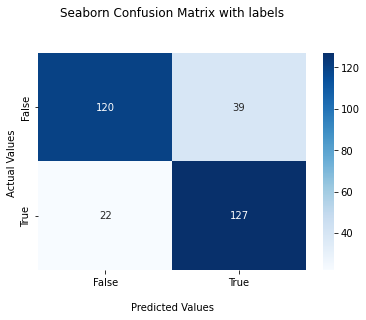

In [115]:
accuracy_report(clf_log, X_test_ss, y_test, y_preds_clf_logistic)

c:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


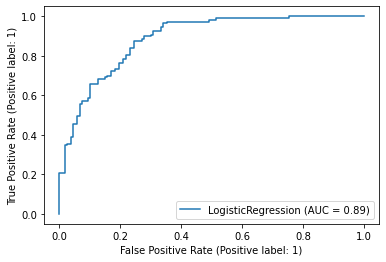

In [116]:
plot_roc_curve(clf_log.best_estimator_,
              X_test_ss,
              y_test)

### KNN

The accuracy of testing data is  98.05 %
The ROC_AUC score is  97.99 %
 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       159
           1       1.00      0.96      0.98       149

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



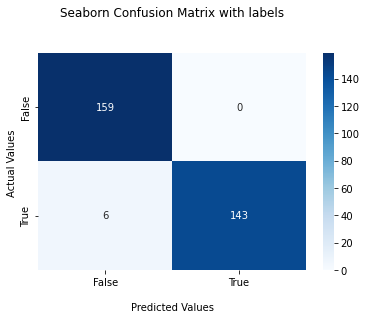

In [117]:
accuracy_report(clf_knn, X_test_ss, y_test, y_preds_clf_knn)

c:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


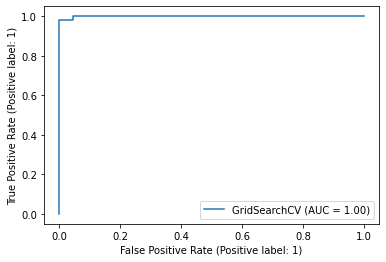

In [118]:
plot_roc_curve(clf_knn,
              X_test_ss,
              y_test)

### Gradient Boosting

The accuracy of testing data is  98.05 %
The ROC_AUC score is  98.05 %
 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       159
           1       0.98      0.98      0.98       149

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



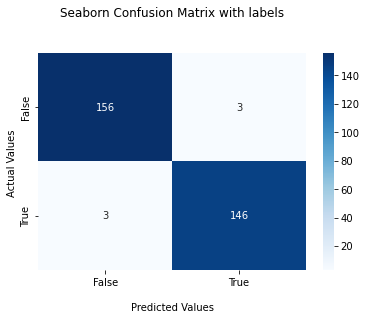

In [119]:
accuracy_report(clf_gb, X_test_ss, y_test, y_preds_clf_gb)

c:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


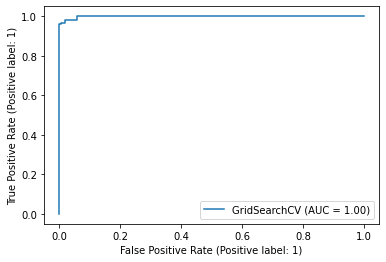

In [120]:
plot_roc_curve(clf_gb,
              X_test_ss,
              y_test)

### SVM

The accuracy of testing data is  99.68 %
The ROC_AUC score is  99.69 %
 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       159
           1       0.99      1.00      1.00       149

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



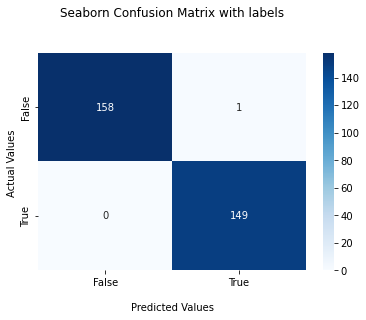

In [121]:
accuracy_report(clf_svm, X_test_ss, y_test, y_preds_clf_svm)

c:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


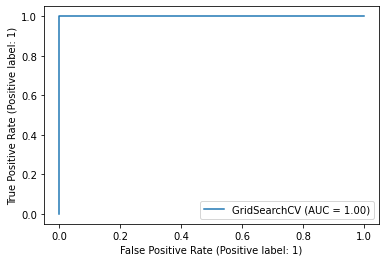

In [122]:
plot_roc_curve(clf_svm,
              X_test_ss,
              y_test)

### Random Forest

The accuracy of testing data is  85.06 %
The ROC_AUC score is  85.26 %
 
              precision    recall  f1-score   support

           0       0.91      0.79      0.85       159
           1       0.80      0.91      0.86       149

    accuracy                           0.85       308
   macro avg       0.86      0.85      0.85       308
weighted avg       0.86      0.85      0.85       308



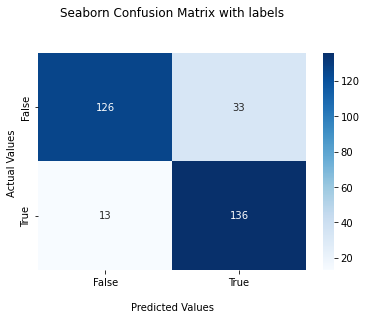

In [123]:
accuracy_report(clf_rf, X_test_ss, y_test, y_preds_clf_rf)

c:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


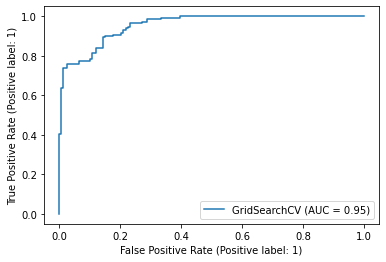

In [124]:
plot_roc_curve(clf_rf,
              X_test_ss,
              y_test)

### GaussianNB

The accuracy of testing data is  81.17 %
The ROC_AUC score is  81.40 %
 
              precision    recall  f1-score   support

           0       0.87      0.74      0.80       159
           1       0.76      0.89      0.82       149

    accuracy                           0.81       308
   macro avg       0.82      0.81      0.81       308
weighted avg       0.82      0.81      0.81       308



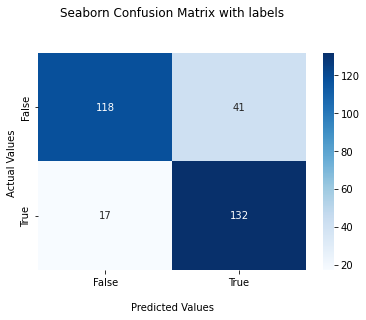

In [125]:
accuracy_report(clf_gnb, X_test_ss, y_test, y_preds_clf_gnb)

c:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


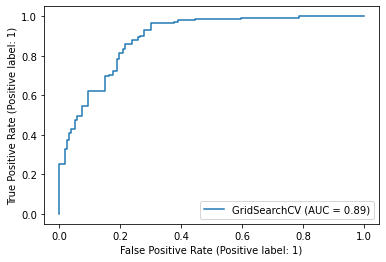

In [126]:
plot_roc_curve(clf_gnb,
              X_test_ss,
              y_test)

### Decision Tree

The accuracy of testing data is  90.58 %
The ROC_AUC score is  90.65 %
 
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       159
           1       0.88      0.93      0.90       149

    accuracy                           0.91       308
   macro avg       0.91      0.91      0.91       308
weighted avg       0.91      0.91      0.91       308



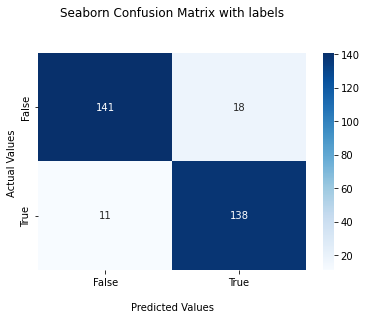

In [127]:
accuracy_report(clf_dt, X_test_ss, y_test, y_preds_clf_dt)

c:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


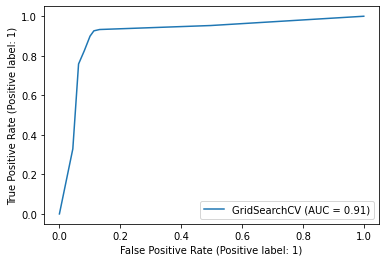

In [128]:
plot_roc_curve(clf_dt,
              X_test_ss,
              y_test)

## RandomizedSearchCV

In [129]:
y_preds_rs_log = rs_log.predict(X_test_ss)
y_preds_rs_knn = rs_knn.predict(X_test_ss)
y_preds_rs_xgb = rs_xgb.predict(X_test_ss)
y_preds_rs_svm = rs_svm.predict(X_test_ss)
y_preds_rs_rf = rs_rf.predict(X_test_ss)
y_preds_rs_gnb = rs_gnb.predict(X_test_ss)
y_preds_rs_dt = rs_dt.predict(X_test_ss)

c:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Logistic Regression

The accuracy of testing data is  80.19 %
The ROC_AUC score is  80.35 %
 
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       159
           1       0.77      0.85      0.81       149

    accuracy                           0.80       308
   macro avg       0.81      0.80      0.80       308
weighted avg       0.81      0.80      0.80       308



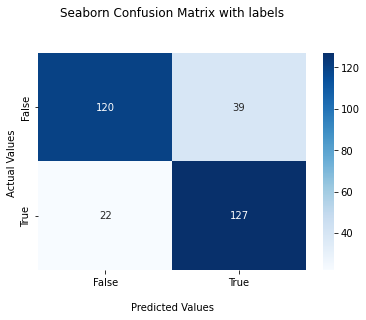

In [130]:
accuracy_report(rs_log, X_test_ss, y_test, y_preds_rs_log)

c:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


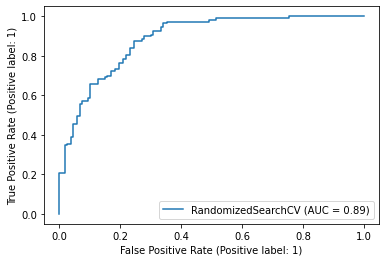

In [131]:
plot_roc_curve(rs_log,
              X_test_ss,
              y_test)

### KNN

The accuracy of testing data is  94.81 %
The ROC_AUC score is  94.72 %
 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       159
           1       0.97      0.92      0.94       149

    accuracy                           0.95       308
   macro avg       0.95      0.95      0.95       308
weighted avg       0.95      0.95      0.95       308



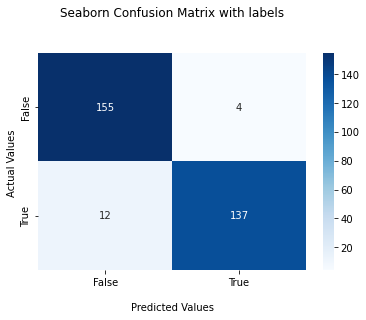

In [132]:
accuracy_report(rs_knn, X_test_ss, y_test, y_preds_rs_knn)

c:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


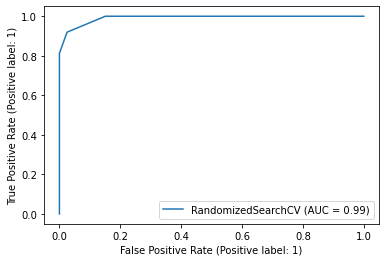

In [133]:
plot_roc_curve(rs_knn,
              X_test_ss,
              y_test)

### Gradient Boosting

The accuracy of testing data is  98.38 %
The ROC_AUC score is  98.34 %
 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       159
           1       0.99      0.97      0.98       149

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



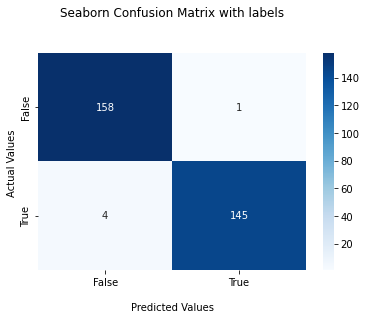

In [134]:
accuracy_report(rs_xgb, X_test_ss, y_test, y_preds_rs_xgb)

c:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


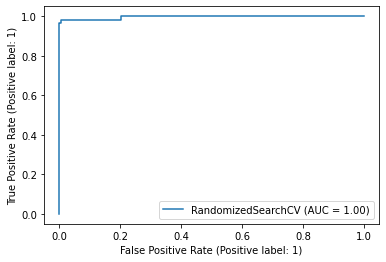

In [135]:
plot_roc_curve(rs_xgb,
              X_test_ss,
              y_test)

### SVM

The accuracy of testing data is  97.73 %
The ROC_AUC score is  97.67 %
 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       159
           1       0.99      0.96      0.98       149

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



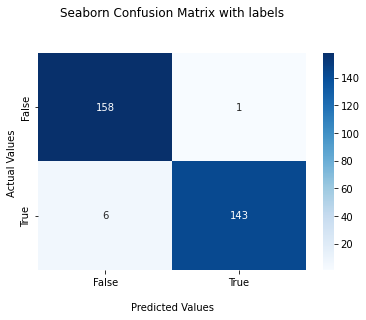

In [136]:
accuracy_report(rs_svm, X_test_ss, y_test, y_preds_rs_svm)

c:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


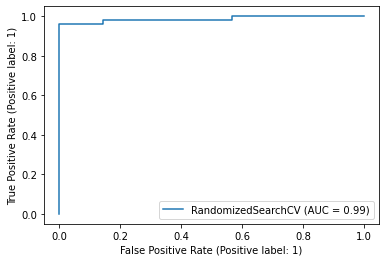

In [137]:
plot_roc_curve(rs_svm,
              X_test_ss,
              y_test)

### Random Forest

The accuracy of testing data is  99.03 %
The ROC_AUC score is  98.99 %
 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       159
           1       1.00      0.98      0.99       149

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



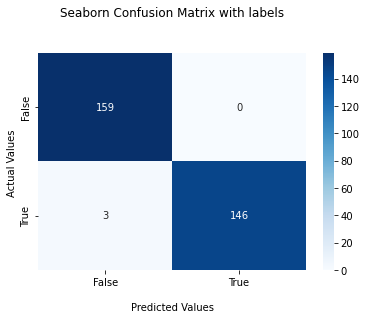

In [138]:
accuracy_report(rs_rf, X_test_ss, y_test, y_preds_rs_rf)

c:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


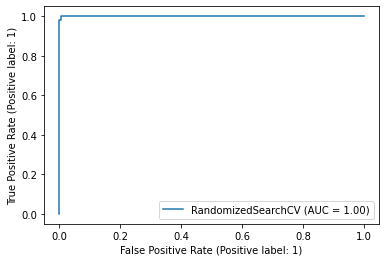

In [139]:
plot_roc_curve(rs_rf,
              X_test_ss,
              y_test)

### GaussianNB

The accuracy of testing data is  98.38 %
The ROC_AUC score is  98.34 %
 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       159
           1       0.99      0.97      0.98       149

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



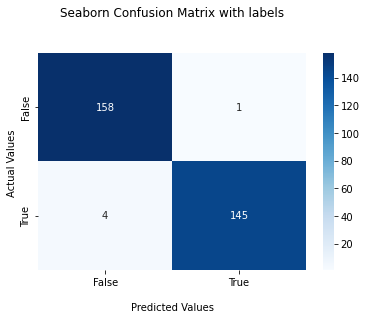

In [140]:
accuracy_report(rs_xgb, X_test_ss, y_test, y_preds_rs_xgb)

c:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


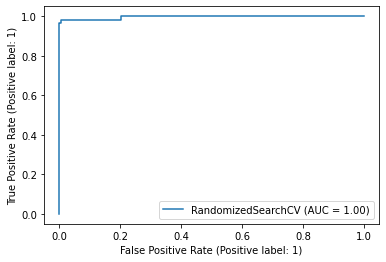

In [141]:
plot_roc_curve(rs_xgb,
              X_test_ss,
              y_test)

### Decision Tree

The accuracy of testing data is  93.51 %
The ROC_AUC score is  93.44 %
 
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       159
           1       0.95      0.91      0.93       149

    accuracy                           0.94       308
   macro avg       0.94      0.93      0.93       308
weighted avg       0.94      0.94      0.93       308



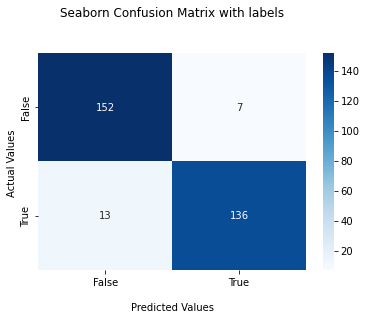

In [142]:
accuracy_report(rs_dt, X_test_ss, y_test, y_preds_rs_dt)

c:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


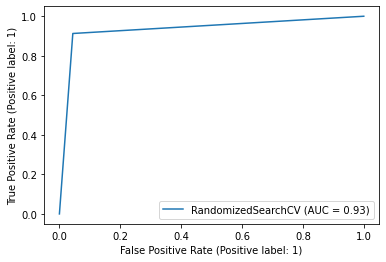

In [143]:
plot_roc_curve(rs_dt,
              X_test_ss,
              y_test)

## Cross validation

Algorithm that are used:
1. SVM
2. KNN
3. Gradient Boosting

These 3 algorithms have the most accuracy and better performance

### Cross-validated accuracy

In [ ]:
cv_acc = {}

In [ ]:
clf_svm.best_params_

In [ ]:
cv_acc_svm = cv_metrics('accuracy',clf_svm)


In [ ]:
cv_acc['SVM'] = cv_acc_svm

In [ ]:
cv_acc_knn = cv_metrics('accuracy',clf_knn)


In [ ]:
cv_acc['KNN'] = cv_acc_knn

In [ ]:
cv_acc_xgb = cv_metrics('accuracy',clf_gb)

In [ ]:
cv_acc['Gradient Boosting'] = cv_acc_xgb

In [ ]:
cv_acc

### Cross-validated precision

In [ ]:
cv_prec = {}

In [ ]:
cv_prec_svm = cv_metrics('precision',clf_svm)


In [ ]:
cv_prec['SVM'] = cv_prec_svm

In [ ]:
cv_prec_knn = cv_metrics('precision',clf_knn)


In [ ]:
cv_prec['KNN'] = cv_prec_knn

In [ ]:
cv_prec_xgb = cv_metrics('precision',clf_gb)

In [ ]:
cv_prec['Gradient Boosting'] = cv_prec_xgb

In [ ]:
cv_prec

### Cross-validated Recall

In [144]:
cv_recall = {}

In [145]:
models_recall = {
    'KNN': clf_knn,
    'LogisticRegression' : clf_log,
    'Gradient Boosting' : clf_gb,
    'SVM' : clf_svm,
    'Random Forest' : clf_rf,
    'GaussianNB' : clf_gnb,
    'Decision Tree' : clf_dt
}

In [146]:
evaluations_recall = cal_recall(models_recall)
model_comparasions_recall = pd.DataFrame(evaluations_recall, index=['Recall'])
model_comparasions_recall.T


KNN estimated with 0.9828571428571429% recall
LogisticRegression estimated with 0.8613117699910152% recall
Gradient Boosting estimated with 0.9923809523809524% recall
SVM estimated with 0.9771428571428572% recall
Random Forest estimated with 0.9411859838274932% recall
GaussianNB estimated with 0.8460736747529201% recall
Decision Tree estimated with 0.9752740341419587% recall


,Recall
KNN,0.982857
LogisticRegression,0.861312
Gradient Boosting,0.992381
SVM,0.977143
Random Forest,0.941186
GaussianNB,0.846074
Decision Tree,0.975274


### Cross-validated F1 Score

In [ ]:
models_f1 = {
    'KNN': clf_knn,
    'LogisticRegression' : clf_log,
    'Gradient Boosting' : clf_gb,
    'SVM' : clf_svm,
    'Random Forest' : clf_rf,
    'GaussianNB' : clf_gnb,
    'Decision Tree' : clf_dt
}

In [151]:
evaluations_f1 = cal_f1(models_f1)
model_comparasions_f1 = pd.DataFrame(evaluations_f1, index=['F1 Score'])
model_comparasions_f1.T


KNN estimated with 98.84021949257352% F1 score
LogisticRegression estimated with 84.28314295604015% F1 score
Gradient Boosting estimated with 99.05089057714996% F1 score
SVM estimated with 98.00002234639369% F1 score
Random Forest estimated with 91.01358738548771% F1 score
GaussianNB estimated with 83.25330744022332% F1 score
Decision Tree estimated with 96.10459725091019% F1 score


,F1 Score
KNN,0.988402
LogisticRegression,0.842831
Gradient Boosting,0.990509
SVM,0.980000
Random Forest,0.910136
GaussianNB,0.832533
Decision Tree,0.961046


In [53]:
rs_models_f1 = {
    'KNN': KNeighborsClassifier(n_neighbors = 3),
    'LogisticRegression' : LogisticRegression(solver = 'liblinear', penalty='l1', C=0.08858667904100823),
    'Gradient Boosting' : GradientBoostingClassifier(n_estimators = 70, max_features = 6, max_depth = 5, learning_rate = 0.4),
    'SVM' : SVC(kernel = 'poly', gamma = 1.0, C = 0.1),
    'Random Forest' : RandomForestClassifier(n_estimators = 100, min_samples_split=2,min_samples_leaf = 1, max_features = 'auto', max_depth =30, bootstrap = 'False'),
    'GaussianNB' : GaussianNB(var_smoothing = 1.0),
    'Decision Tree' : DecisionTreeClassifier(min_samples_split = 2, max_features = 'sqrt', max_depth = 10, criterion = 'gini')
}

In [55]:
rs_f1 = {}

In [61]:
rs_f1_knn = cv_metrics('f1',KNeighborsClassifier(n_neighbors = 3))
rs_f1['KNeighborsClassifier'] = rs_f1_knn
rs_f1_knn

0.8924704844200235

In [60]:
rs_f1_log = cv_metrics('f1',LogisticRegression(solver = 'liblinear', penalty='l1', C=0.08858667904100823))
rs_f1['Logistic Regression'] = rs_f1_log
rs_f1_log

0.8336302239838738

In [59]:
rs_f1_xgb = cv_metrics('f1',GradientBoostingClassifier(n_estimators = 70, max_features = 6, max_depth = 5, learning_rate = 0.4))
rs_f1['GradientBoostingClassifier'] = rs_f1_xgb
rs_f1_xgb

0.9904272564553127

In [62]:
rs_f1_svm = cv_metrics('f1',SVC(kernel = 'poly', gamma = 1.0, C = 0.1))
rs_f1['SVM'] = rs_f1_svm
rs_f1_svm

In [ ]:
rs_f1_rf = cv_metrics('f1',RandomForestClassifier(n_estimators = 100, min_samples_split=2,min_samples_leaf = 1, max_features = 'auto', max_depth =30, bootstrap = 'False'))
rs_f1['RandomForestClassifier'] = rs_f1_rf
rs_f1_rf

In [ ]:
rs_f1_gnb = cv_metrics('f1',GaussianNB(var_smoothing = 1.0))
rs_f1['GaussianNB'] = rs_f1_gnb
rs_f1_gnb

In [ ]:
rs_f1_dt = cv_metrics('f1',DecisionTreeClassifier(min_samples_split = 2, max_features = 'sqrt', max_depth = 10, criterion = 'gini'))
rs_f1['Decision Tree'] = rs_f1_dt
rs_f1_dt

In [ ]:
rs_f1

In [54]:
rs_evaluations_f1 = cal_f1(rs_models_f1)
rs_model_comparasions_f1 = pd.DataFrame(rs_evaluations_f1, index=['F1 Score'])
rs_model_comparasions_f1.T


## Feature Importance

Feature 0 : age
Feature 1 : sex
Feature 2 : chest_pain_type
Feature 3 : resting_blood_pressure
Feature 4 : cholestoral
Feature 5 : fasting_blood_sugar
Feature 6 : rest_ecg
Feature 7 : Max_heart_rate
Feature 8 : exercise_induced_angina
Feature 9 : oldpeak
Feaature 10 : slope
Feature 11 : vessels_colored_by_flourosopy
Feature 12 : thalassemia

In [152]:
clf_knn.fit(X_train_os_ss,y_train_os_ss)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [153]:
model_knn = KNeighborsClassifier(metric = 'minkowski',n_neighbors = 3, weights = 'distance')

Feature: 0, Score: 0.03342
Feature: 1, Score: 0.03050
Feature: 2, Score: 0.04881
Feature: 3, Score: 0.03501
Feature: 4, Score: 0.03687
Feature: 5, Score: 0.04775
Feature: 6, Score: 0.04775
Feature: 7, Score: 0.02653
Feature: 8, Score: 0.03024
Feature: 9, Score: 0.03528
Feature: 10, Score: 0.02361
Feature: 11, Score: 0.06340
Feature: 12, Score: 0.05385


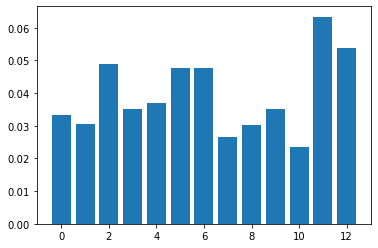

In [154]:
feature_importance(model_knn,X_train_os_ss,y_train_os_ss)

1. vessels_colored_by_flourosopy
2. thalassemia
3. fasting_blood_sugar
4. rest_ecg
5. chest_pain_type
6. cholestoral
7. chest_pain_type
8. exercise_induced_angina

In [155]:
clf_gb.best_params_

{'learning_rate': 0.4, 'max_depth': 5, 'max_features': 1, 'n_estimators': 70}

In [156]:
model_gb = GradientBoostingClassifier(learning_rate = 0.4, max_depth = 5, max_features = 1, n_estimators = 100)

In [157]:
model_gb.fit(X_train_os_ss,y_train_os_ss)

GradientBoostingClassifier(learning_rate=0.4, max_depth=5, max_features=1)

Feature: 0, Score: 0.01061
Feature: 1, Score: 0.02626
Feature: 2, Score: 0.01406
Feature: 3, Score: 0.00663
Feature: 4, Score: 0.00955
Feature: 5, Score: 0.00743
Feature: 6, Score: 0.00822
Feature: 7, Score: 0.00610
Feature: 8, Score: 0.00981
Feature: 9, Score: 0.01485
Feature: 10, Score: 0.00875
Feature: 11, Score: 0.08488
Feature: 12, Score: 0.01167


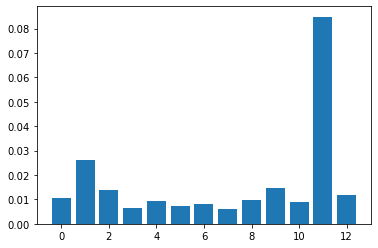

In [158]:
feature_importance(model_gb,X_train_os_ss,y_train_os_ss)

1. vessels_colored_by_flourosopy
2. thalassemia
3. cholestoral
4. sex
5. oldpeak
6. chest_pain_type
7. fasting_blood_sugar

In [159]:
clf_svm.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [160]:
model_svm = SVC(C = 10, gamma = 0.1, kernel = 'rbf')

Feature: 0, Score: 0.03793
Feature: 1, Score: 0.05146
Feature: 2, Score: 0.07135
Feature: 3, Score: 0.04483
Feature: 4, Score: 0.04138
Feature: 5, Score: 0.04642
Feature: 6, Score: 0.06260
Feature: 7, Score: 0.03528
Feature: 8, Score: 0.03793
Feature: 9, Score: 0.06790
Feature: 10, Score: 0.04536
Feature: 11, Score: 0.07984
Feature: 12, Score: 0.09602


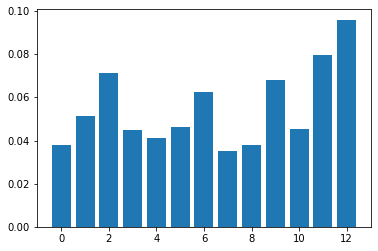

In [161]:
feature_importance(model_svm,X_train_os_ss,y_train_os_ss)

Feature 12 : thalassemia
Feature 11 : vessels_colored_by_flourosopy
Feature 2 : chest_pain_type
Feature 9 : oldpeak
Feature 6 : rest_ecg
Feature 5 : fasting_blood_sugar
Feature 1 : sex

In [ ]:
model_predict = SVC(C=10,gamma=0.1,kernel='rbf')
model_predict.fit(X_train_os_ss,y_train_os_ss)

In [ ]:
pickle.dump(model_predict,open('model.pkl','wb'))

In [ ]:
dataset.head(5)